> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>**Tip** ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

>**Tip** ● ‘Neighborhood’ indicates the location of the hospital. 

>**Tip** ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 

>**Tip** ● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>**Tip**: What is the rate show vs. no-show ratio?

> **Tip**: Does the age affect the attendance rate?

> **Tip**: Does the scholarship affect the attendance rate?

> **Tip**: Does the chronic diseases (diabetes and Hypertension) affect the attendance rate?

> **Tip**: Does the gender affect the attendance rate?

> **Tip**: Is there a relationship between chronic disease (diabetes and Hypertension) and age?

> **Tip**: Is there a relationship between age and getting a scholarship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is an error in a column where a negative value appears in the column, which does not make sense.
***

In [8]:
# check duplicate value
df.duplicated().sum()

0

In [9]:
# check null value
df.isnull().any().any()

False


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

**Modify the names of some columns**


In [10]:
#columns names
df.rename(columns={'Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Remove unnecessary columns**

In [11]:
#Drop unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'SMS_received'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


**Cleaning the negative ages by replacing with the mean**

In [12]:
#cleaning the negative ages
mean_age = df['Age'].mean()
df.loc[df['Age'] <0, 'Age'] = mean_age

In [13]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


**divide the DataFrame into 2 DataFrames (df_show and df_noshow)**

In [14]:
# Make the show DataFrame
df_show = df[df['No_show'] == 'No'].copy()
df_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,No_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,No


In [15]:
# Make the no_show DataFrame
df_noshow = df[df['No_show'] == 'Yes'].copy()
df_noshow.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,No_show
6,F,23.0,GOIABEIRAS,0,0,0,0,0,Yes
7,F,39.0,GOIABEIRAS,0,0,0,0,0,Yes
11,M,29.0,NOVA PALESTINA,0,0,0,0,0,Yes
17,F,40.0,CONQUISTA,1,0,0,0,0,Yes
20,F,30.0,NOVA PALESTINA,0,0,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




**An overview of basic data and statistics**

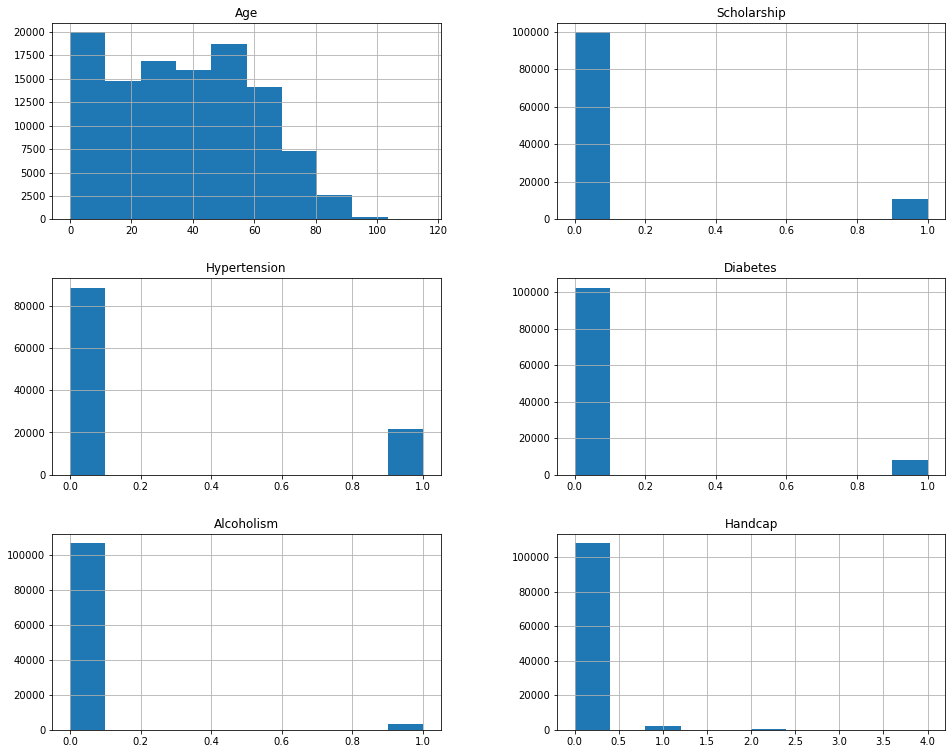

In [16]:
df.hist(figsize= (16,13));

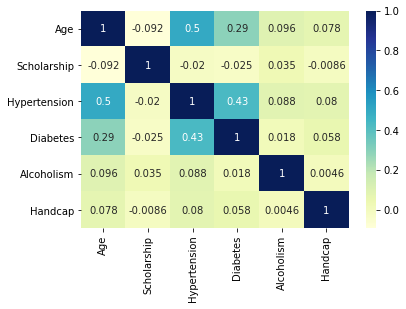

In [46]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Through correlation heatmap we find that there is a clear relationship between chronic diseases and age, but hypertension is more related to age.
We also find that there is a strong relationship between diabetes and hypertension.
***

**Data and stats overview for df_show**

In [17]:
df_show.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000
mean,37.790496,0.093903,0.204392,0.073837,0.030417,0.022742
std,23.338513,0.291695,0.403259,0.261507,0.171732,0.162750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


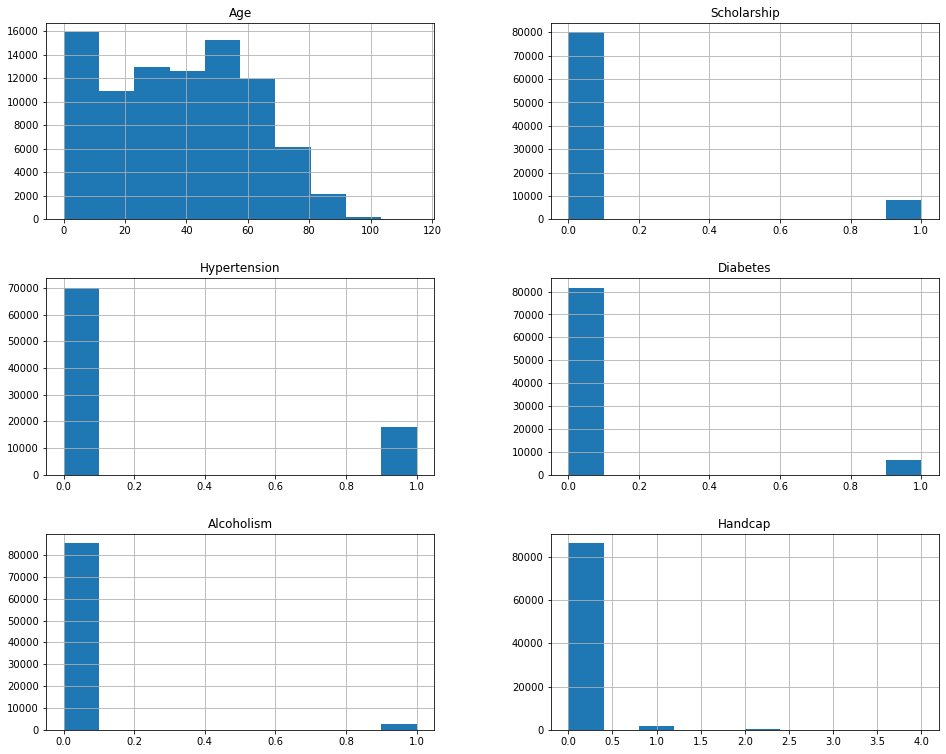

In [18]:
df_show.hist(figsize = (16,13));

**Data and stats overview for df_noshow**

In [19]:
df_noshow.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


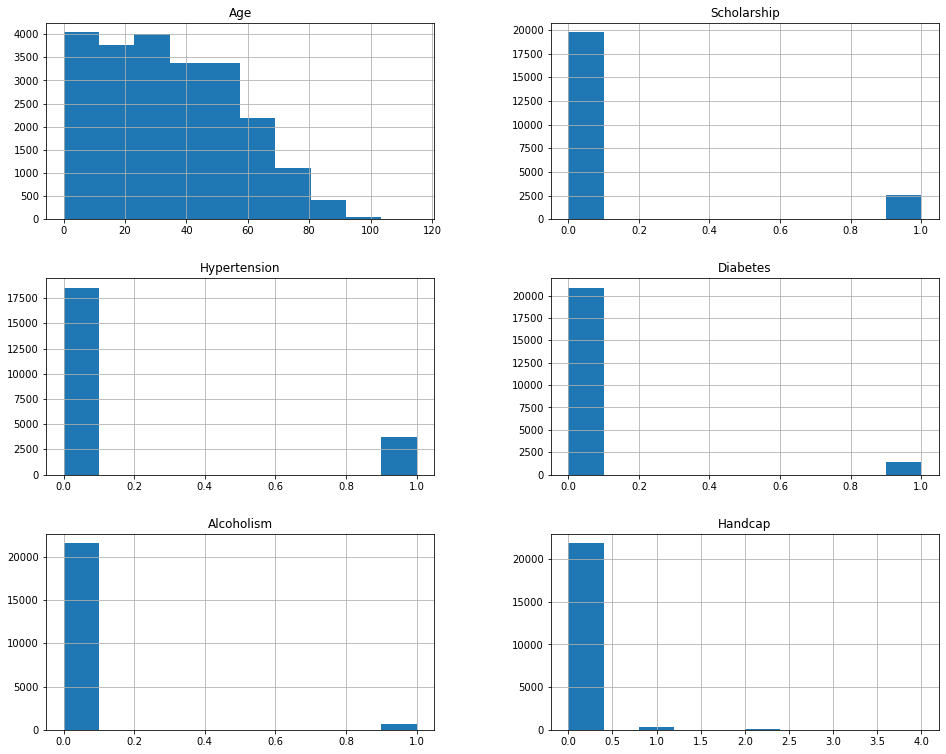

In [20]:
df_noshow.hist(figsize = (16,13));

### Research Question 1: What is the rate show vs. no-show ratio?

Used a pie chart because it is the best chart to show percentages between show and noshow

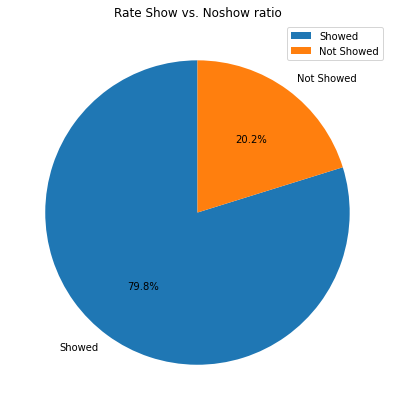

In [21]:
#pie chart for Showed and Not Showed patients
plt.figure(figsize =(7,7)) #set the size of figure
plt.pie([len(df_show),len(df_noshow)],labels =['Showed','Not Showed'],autopct='%1.1f%%',startangle=90)
plt.title('Rate Show vs. Noshow ratio')
plt.legend();

From the pie chart, it is clear that approximately 80% attended, while 20% did not attend

### Research Question 2: Does the age affect the attendance rate?

In [33]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

Uses the histogram because it is the best chart for making comparisons between columns and some of them

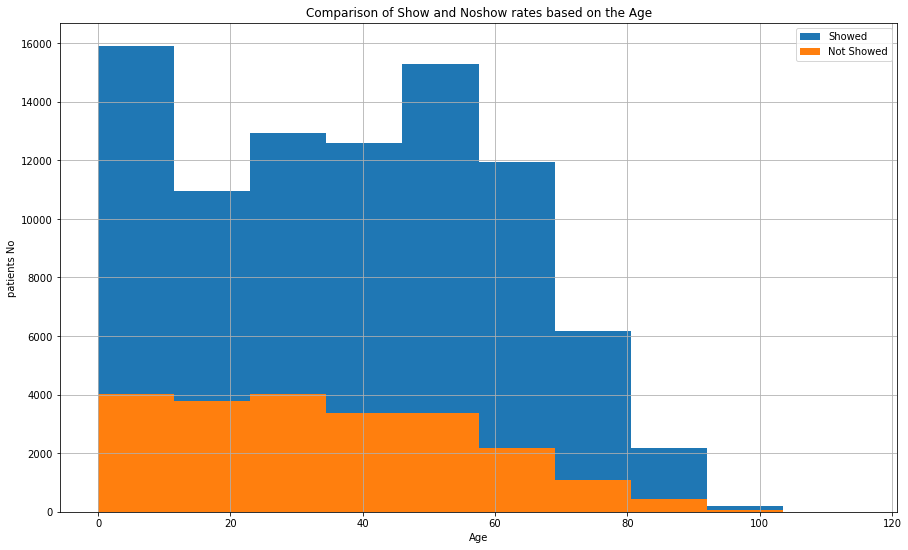

In [34]:
#plotting Histograms of patients ages (Showed, Not Showed)
plt.figure(figsize=[15, 9])
df.Age[show].hist(label = 'Showed')
df.Age[noshow].hist(label = 'Not Showed')
plt.legend()
plt.title('Comparison of Show and Noshow rates based on the Age')
plt.xlabel('Age')
plt.ylabel('patients No');

Children from one year to 10 years, adults from the age of 40 to 60 are more than those who attended the appointment

### Research Question 3: Does the scholarship affect the attendance rate?

The histogram is used because it is the best plot for making comparison between scholarship and attendance

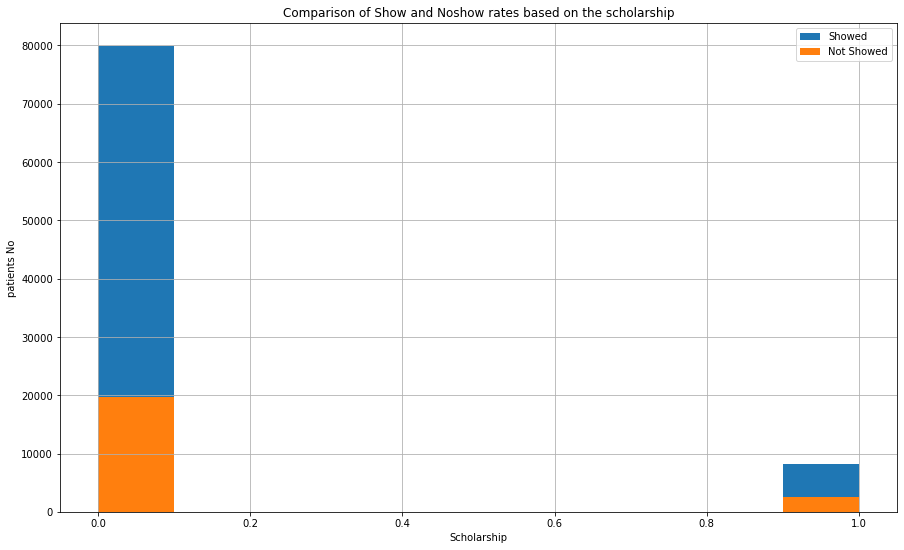

In [35]:
#plotting Histograms of patients scholarship (Showed, Not Showed)
plt.figure(figsize=[15, 9]) #set the size of figure
df.Scholarship[show].hist(label = 'Showed')
df.Scholarship[noshow].hist(label = 'Not Showed')
plt.legend()
plt.title('Comparison of Show and Noshow rates based on the scholarship')
plt.xlabel('Scholarship')
plt.ylabel('patients No');

There is no strong relationship between attendance and scholarship.
The relationship is insignificant

### Research Question 4: Does the chronic diseases (diabetes and Hypertension) affect the attendance rate?

The histogram is used because it is the best plot for making comparison between chronic diseases and attendance

In [66]:
#Create list containing chronic diseases
chronic_diseases = ['Hypertension', 'Diabetes']

# Get relevant data and argue about it for conclusions
binary = df[chronic_diseases].stack(level=0)
binary = pd.DataFrame(binary)
binary.reset_index(drop=False, inplace =True)
binary.columns = ['level_0', 'level_1', 'value']

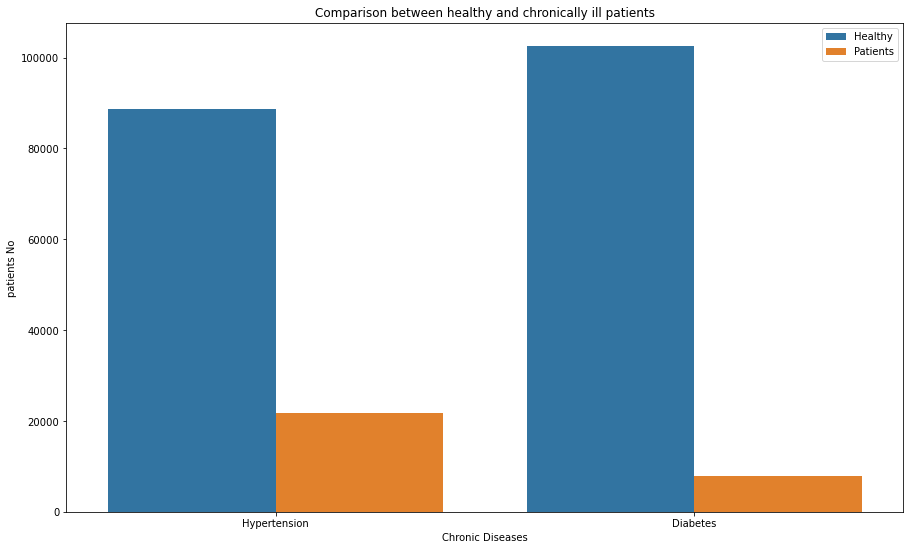

In [84]:
plt.figure(figsize=[15,9])
sns.countplot(data=binary, x='level_1', hue='value')
plt.title('Comparison between healthy and chronically ill patients')
plt.xlabel('Chronic Diseases')
plt.ylabel('patients No')
plt.legend(['Healthy', 'Patients']);

#### The effect of chronic diseases on attendance rate 

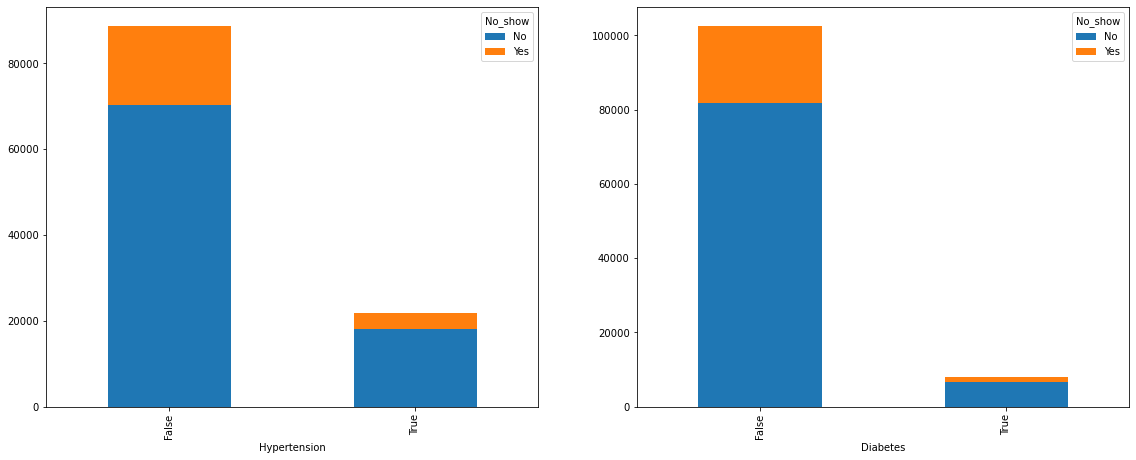

In [77]:
#plotting Histograms of patients chronic diseases
fig = plt.figure(figsize=(30, 25))
for i, var in enumerate(chronic_diseases):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)

There is no strong relationship between attendance and chronic diseases. The relationship is insignificant

### Research Question 5: Does the gender affect the attendance rate?

In [42]:
# Create a table for gender with patients that missed or attended their appointment
gender_tbl = pd.DataFrame(df.groupby(['Gender','No_show']).count()).reset_index()
gender_tbl

,Gender,No_show,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,AgeGroup
0,F,No,57246,57246,57246,57246,57246,57246,57246,57246
1,F,Yes,14594,14594,14594,14594,14594,14594,14594,14594
2,M,No,30962,30962,30962,30962,30962,30962,30962,30962
3,M,Yes,7725,7725,7725,7725,7725,7725,7725,7725


The histogram is used because it is the best plot for making comparison between  gender and attendance

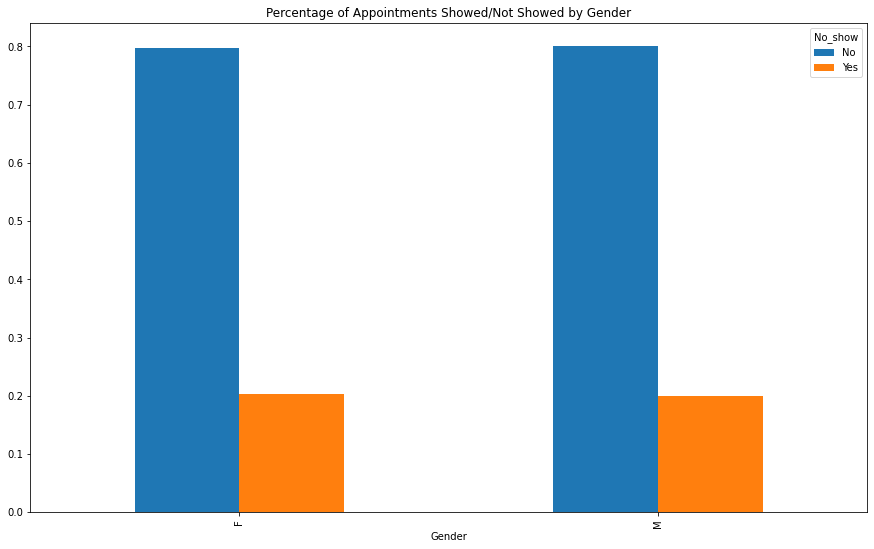

In [78]:
# appointment attendance by gender
gender = df.groupby('Gender')['No_show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(15,9))
gender.set_title("Percentage of Appointments Showed/Not Showed by Gender")
plt.show()

There is no strong relationship between attendance and gender. 
The relationship is insignificant 

### Research Question 6: Is there a relationship between chronic disease (diabetes and hypertension) and age?

In [48]:
# Create age groups using numerical distribution
bins= [0,10,19,26,36,46,56,66,150]
labels = ['Less than 10','10-18','19-25','26-35','36-45','46-55','56-65','More than 65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [49]:
# Convert Integer to Boolean
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x==1 else False)
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x==1 else False)

In [114]:
#Create a function to find the relationship between age and columns
def HDScolPlot(df, grpVar, yVar, normalize=True):
    # plot 
    df.groupby(grpVar) [yVar].value_counts (normalize=normalize).unstack().plot(kind='bar',figsize=(20,8), rot=0,width=0.8);
    # Add title and format it 
    plt.title(f'Distribution of {yVar} by {grpVar}'.title(),fontsize = 14, weight = "bold")
    # Add xlabel and format it 
    plt.xlabel (grpVar.title(),fontsize = 12, weight = "bold") 
    # Add y label and format it 
    plt.ylabel(f'Proportion of {yVar}'.title(),fontsize = 12, weight = "bold")


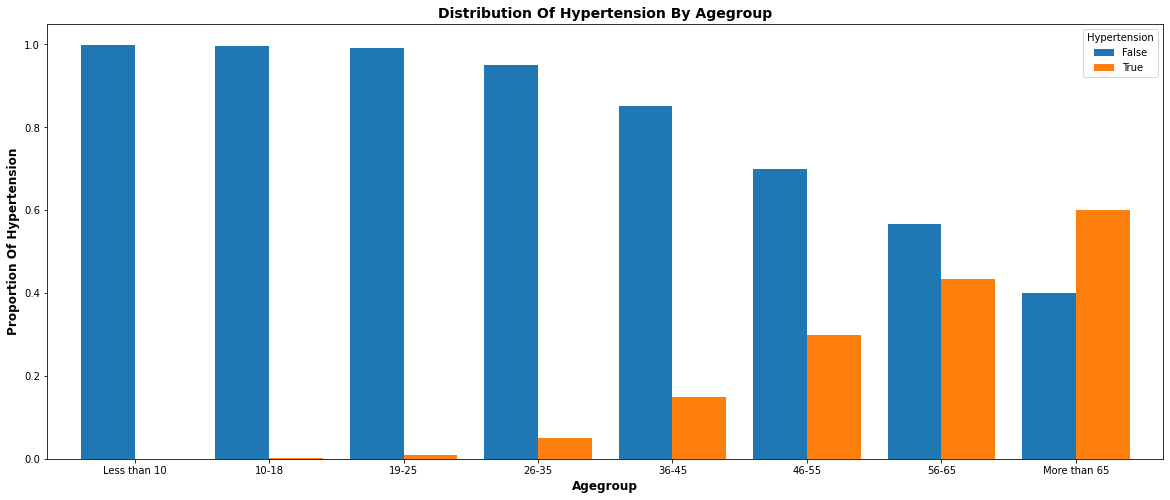

In [118]:
#function call
HDScolPlot(df,'AgeGroup','Hypertension')

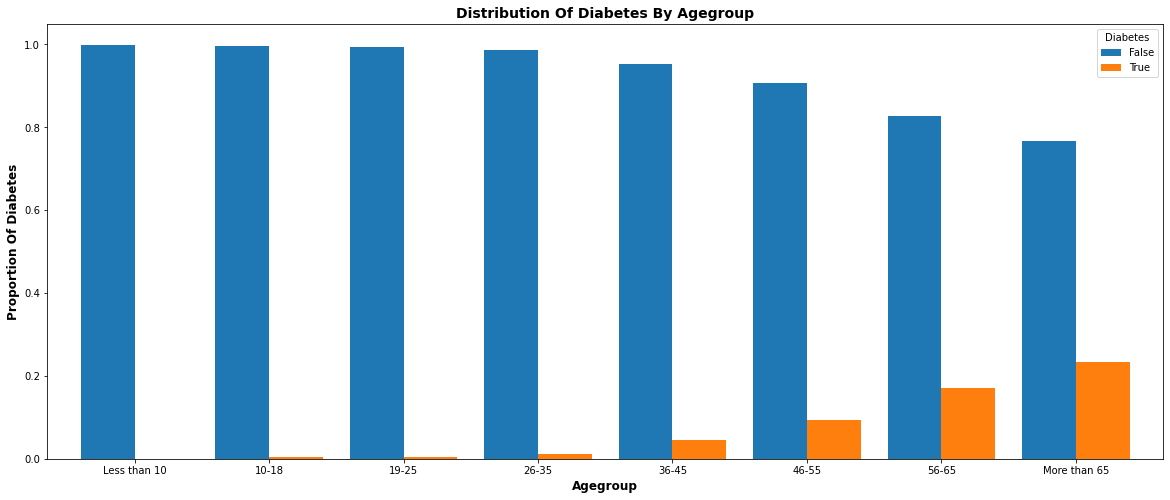

In [119]:
#function call
HDScolPlot(df,'AgeGroup','Diabetes')

There is a direct relationship between chronic diseases and advancing age, so we find that the older we get, the greater the chance of developing chronic diseases, especially hypertension.
The relationship is significant

### Research Question 7: Is there a relationship between age and getting a scholarship?

In [55]:
# Convert Integer to Boolean
df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x==1 else False)

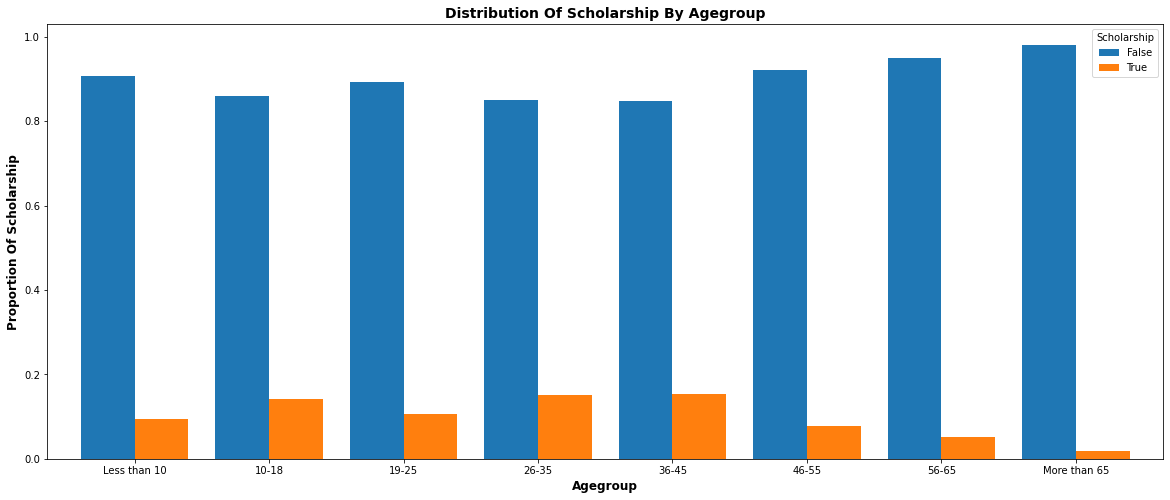

In [120]:
#function call
HDScolPlot(df,'AgeGroup','Scholarship')

The relationship is insignificant

<a id='conclusions'></a>
## Conclusions

> **Research Question 1**:
Attendance rate is approximately 80%


> **Research Question 2**:
The rate age for attendance varies, as we find that children from one year to 10 years are the highest in attendance, followed by men from 50 to 60 years old, followed by different age groups.

> **Research Question 3**:
The scholarship did not affect the attendance rate,  the people who did not receive this scholarship had a much higher attendance rate.
scholarship is insignificant.

> **Research Question 4**:
Chronic disease (diabetes and Hypertension) did not affect attendance significantly.

> **Research Question 5**:
There is no clear relationship between gender and attendance​.

> **Research Question 6**:
There is a strong relationship between chronic diseases and higher ages, but hypertension is more related to age

> **Research Question 7**:
There is no clear relationship between age and scholarship.

### Limitations:
>could not detect direct correlation between patients show and no-show and mandy characters like scholarship, age, chronic diseases, alcoholism, handcap.